<a href="https://colab.research.google.com/github/tawaqalt/arbritrary/blob/master/Tawakalitu_Yusuf_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

class ScratchKMeans:
    def __init__(self, n_clusters, max_iter, tol=1e-4, n_init=10, verbose=False, random_state=None):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.n_init = n_init
        self.verbose = verbose
        self.random_state = random_state

    def fit(self, X):
        np.random.seed(self.random_state)
        best_centroids = None
        min_sse = np.inf

        for _ in range(self.n_init):
            initial_centroids = X[np.random.choice(len(X), self.n_clusters, replace=False)]

            centroids, cluster_assignments, sse = self._fit(X, initial_centroids)

            if self.verbose:
                print(f"Initialization SSE: {sse}")

            if sse < min_sse:
                min_sse = sse
                best_centroids = centroids
                best_cluster_assignments = cluster_assignments

        self.centroids = best_centroids
        self.cluster_assignments = best_cluster_assignments
        return best_cluster_assignments

    def _fit(self, X, initial_centroids):
        centroids = initial_centroids
        for iteration in range(self.max_iter):
            distances = self._compute_distances(X, centroids)
            cluster_assignments = np.argmin(distances, axis=1)

            new_centroids = np.array([X[cluster_assignments == i].mean(axis=0) for i in range(self.n_clusters)])

            if np.linalg.norm(new_centroids - centroids) <= self.tol:
                break

            centroids = new_centroids

        sse = self._compute_sse(X, centroids, cluster_assignments)

        return centroids, cluster_assignments, sse

    def _compute_distances(self, X, centroids):
        return np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)

    def _compute_sse(self, X, centroids, cluster_assignments):
        sse = 0
        for i in range(self.n_clusters):
            cluster_points = X[cluster_assignments == i]
            sse += np.sum((cluster_points - centroids[i]) ** 2)
        return sse

    def predict(self, X):
        distances = self._compute_distances(X, self.centroids)
        cluster_assignments = np.argmin(distances, axis=1)
        return cluster_assignments

In [2]:
#Example usage
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features =2, centers=2, cluster_std=0.5, random_state=0)

## Problem 1

In [3]:
kmeans = ScratchKMeans(n_clusters=2, max_iter=100)
kmeans.fit(X)
kmeans.predict(X)

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0])

In [4]:
n_clusters = 4
a = range(X.shape[0])
np.random.seed(0)
first_point =np.random.choice(a, n_clusters, replace=False)
init = X[first_point,:]
print(init)

[[1.68289011 0.48444439]
 [2.52889351 0.82015861]
 [0.3498724  4.69253251]
 [1.03972612 4.50478201]]


## Problem 2

In [5]:
import numpy as np

def obtain_SSE(X):
    dist = np.zeros((X.shape[0], n_clusters))  # Fixed dimensions for dist array

    # Compute the distance of each point to each cluster center
    for l in range(n_clusters):
        d_a = abs(X - init[l, :])
        d_a2 = d_a ** 2
        d_a3 = np.sum(d_a2, axis=1)
        dist[:, l] = d_a3

    # Calculate SSE and update centroids
    SSE = 0
    clster = np.argmin(dist, axis=1)
    for i in range(n_clusters):
        cluster_points = X[clster == i]
        SSE += np.sum(dist[clster == i, i])
        init[i, :] = np.mean(cluster_points, axis=0)

    return dist, init, SSE

# Assuming you have defined X, n_clusters, and init correctly
dist, init, sse = obtain_SSE(X)

print(sse)

43.98385898780004


The answers to the other problems have been implemented in the scractch code

## Problem 8

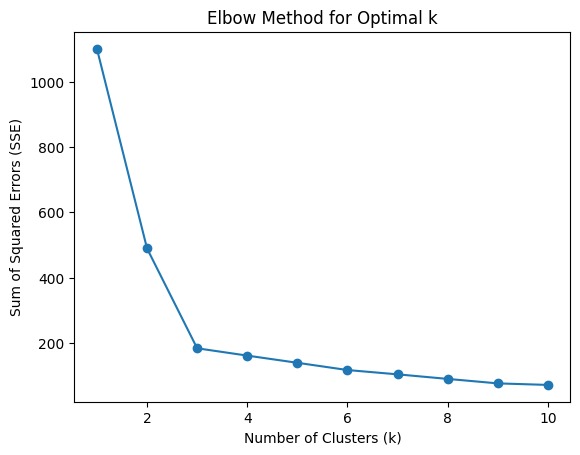

In [6]:
import matplotlib.pyplot as plt
def elbow_method(X):
    sse_values = []
    for k in range(1, 11):
        kmeans = ScratchKMeans(n_clusters=k, max_iter=200, random_state=0)
        kmeans.fit(X)
        sse_values.append(kmeans._compute_sse(X, kmeans.centroids, kmeans.cluster_assignments))  # Calculate SSE

    plt.plot(range(1, 11), sse_values, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Sum of Squared Errors (SSE)')
    plt.title('Elbow Method for Optimal k')
    plt.show()

X, _ = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)
elbow_method(X)


## Problem 9

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


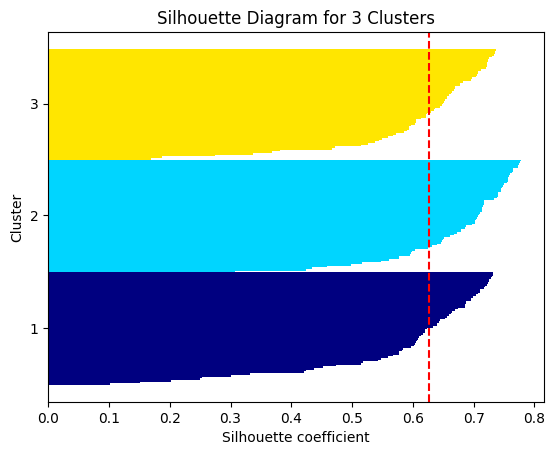

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

def plot_silhouette(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_vals = silhouette_samples(X, cluster_labels)

    y_ax_lower, y_ax_upper = 0, 0
    yticks = []

    for i, c in enumerate(np.unique(cluster_labels)):
        c_silhouette_vals = silhouette_vals[cluster_labels == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = plt.cm.jet(i / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)

    plt.axvline(silhouette_avg, color="red", linestyle="--")
    plt.yticks(yticks, np.unique(cluster_labels) + 1)
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.title(f'Silhouette Diagram for {n_clusters} Clusters')
    plt.show()

# Example usage
n_clusters = 3
plot_silhouette(X, n_clusters)


## Problem 10

In [8]:
import pandas as pd

# reading the dataset
df = pd.read_csv('/content/Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [10]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [11]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
data = df.drop(columns=['Channel', 'Region'])

The data preprocessing shows that the data is cleaned and I will go ahead to process the data

## Dimensionality reduction

In [14]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca = pca.fit(data)
data_pca = pca.transform(data)

[0.45961362 0.86478588 0.93481597 0.97883941 0.99386152 1.        ]


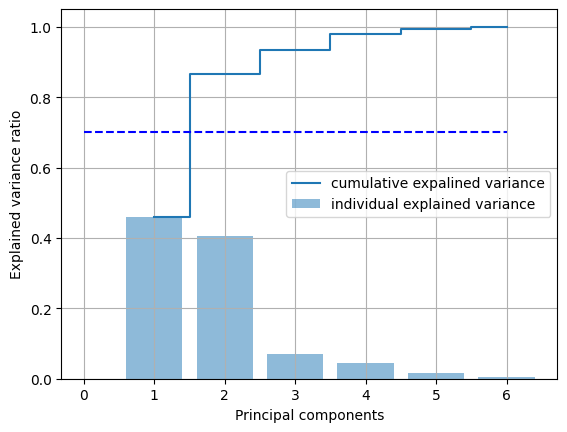

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=None)
pca = pca.fit(data)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

The diagram shows that the optimal number of clusters is 2

## Problem 10

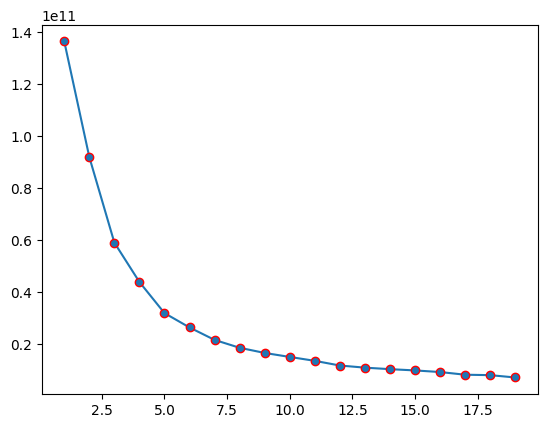

In [16]:
sse = []
cl_num = []
for i in range(1, 20):
  cl_num.append(i)
  km = ScratchKMeans(n_clusters = i, max_iter = 100, verbose=False, random_state =0)
  km.fit(data_pca)
  sse.append(km._compute_sse(data_pca, km.centroids, km.cluster_assignments))
plt.plot(cl_num, sse, marker='o', markeredgecolor = 'red')

I deduced from the elbow plot that 5 might be the best number of clusters but I'll like to use plotting of the cluster to verify this

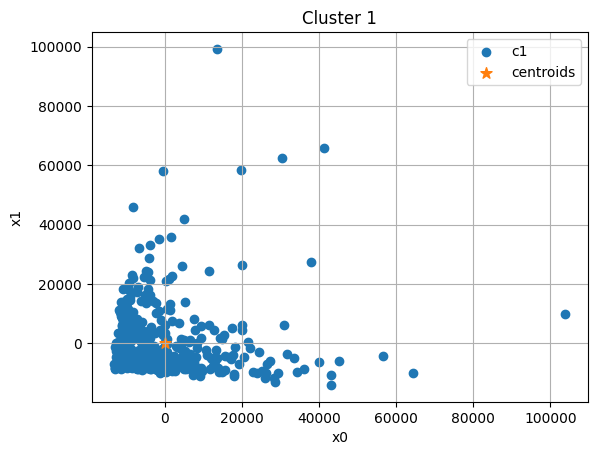

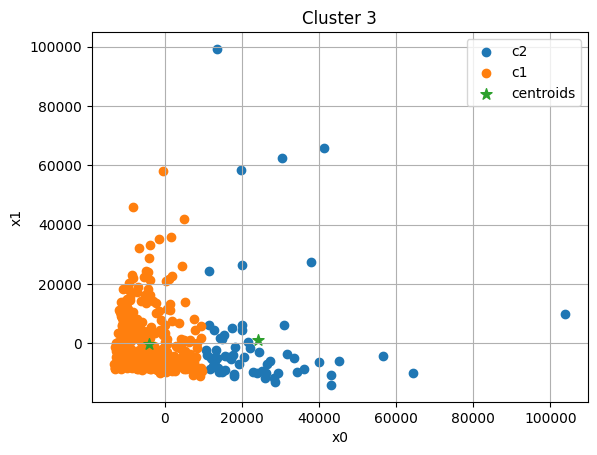

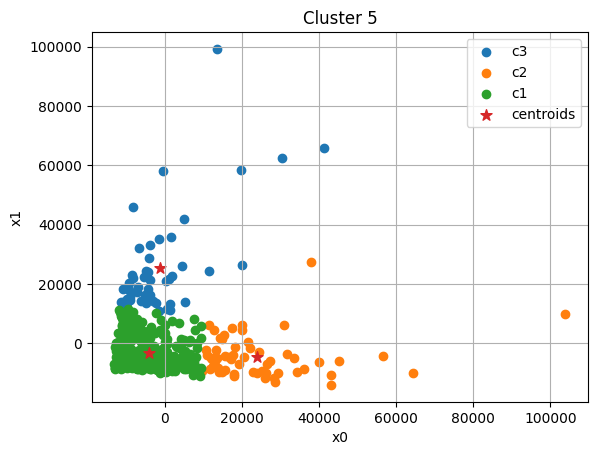

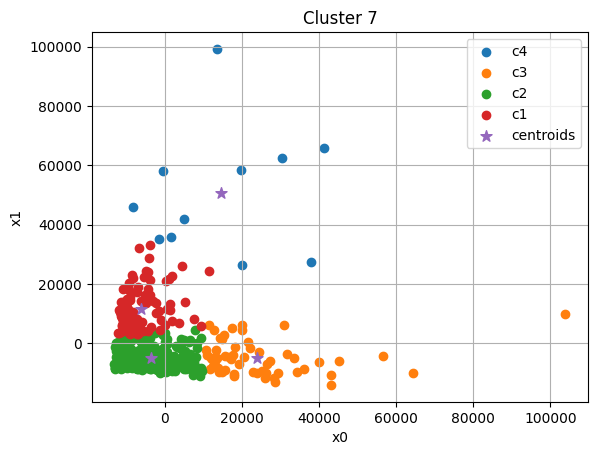

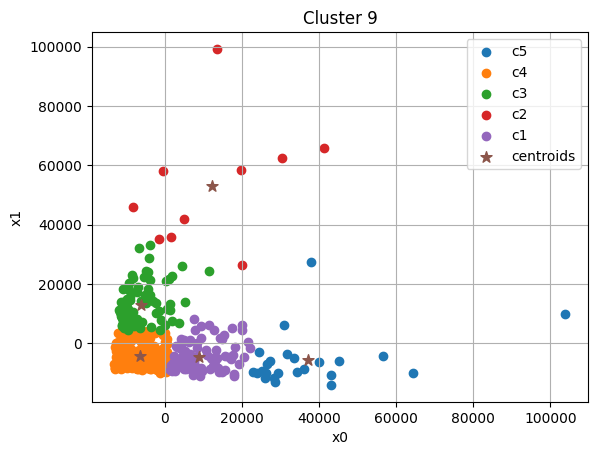

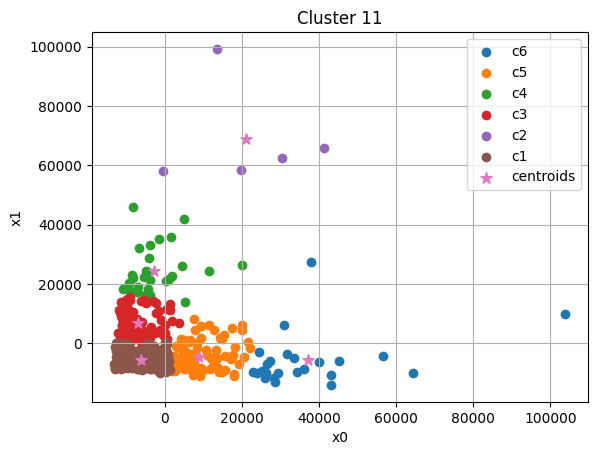

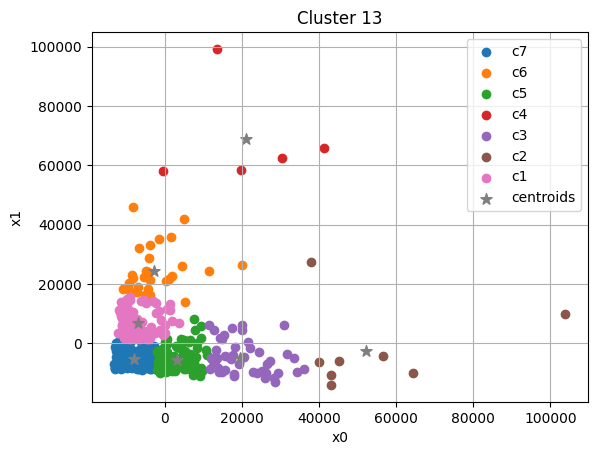

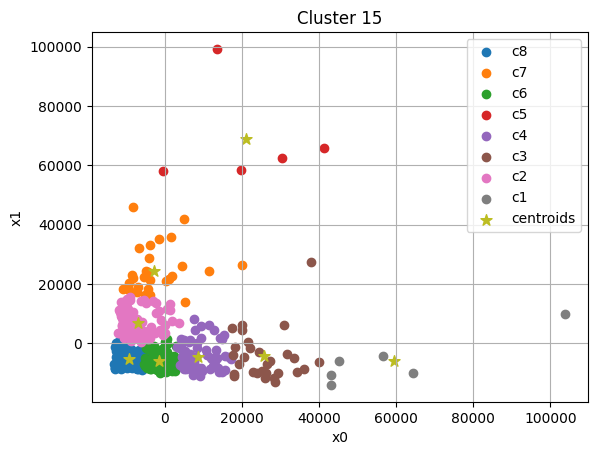

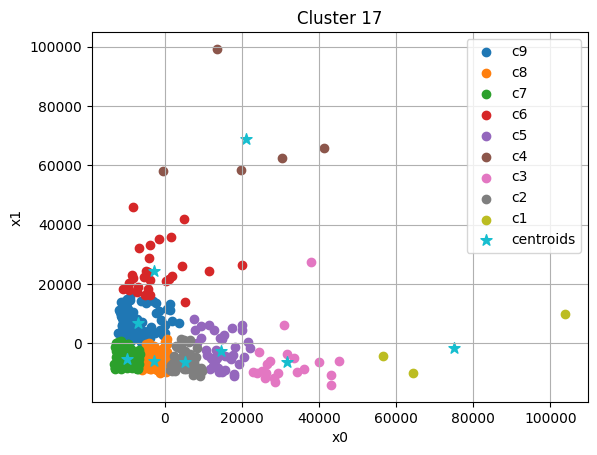

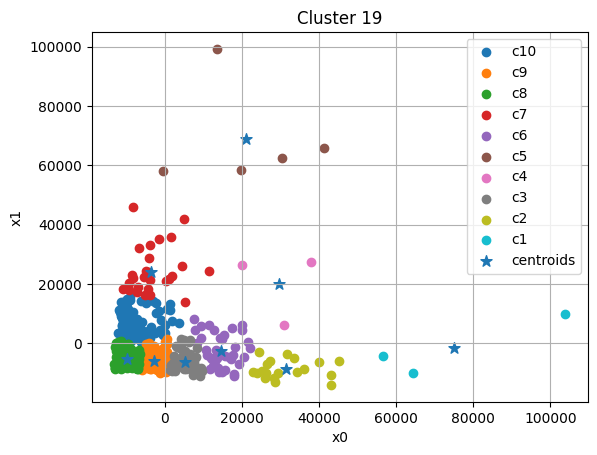

In [17]:
#plotting the number of cluster in the range of 1 - 10
for i in range(1, 11):
  new_km = ScratchKMeans(n_clusters = i, max_iter=15, verbose=False, tol=0, random_state=0)
  new_km.fit(data_pca)
  cl = new_km.predict(data_pca)

  fig = plt.figure()
  ax = fig.add_subplot(1,1,1)

  for l in range(np.unique(cl).shape[0]):
    ax.scatter(data_pca[:, 0][cl==l], data_pca[:, 1][cl==l], label='c{}'.format(i-l))
  ax.scatter(new_km.centroids[:, 0], new_km.centroids[:, 1], s=70, marker='*', label='centroids')
  ax.set_title('Cluster {}'.format(i+l))
  ax.set_xlabel('x0')
  ax.set_ylabel('x1')
  ax.legend()
  ax.grid(True)

  ax.legend(loc='upper right')
  fig.show()



the visualizations supports the optimal number of clusters predicted by the elbow method.

## Problem 11

In [18]:
#checking for the value counts of the Known Groups(Region and channel)
df.Region.value_counts()

Region
3    316
1     77
2     47
Name: count, dtype: int64

there are three unique values in the Region column so this translates to the number of clusters.

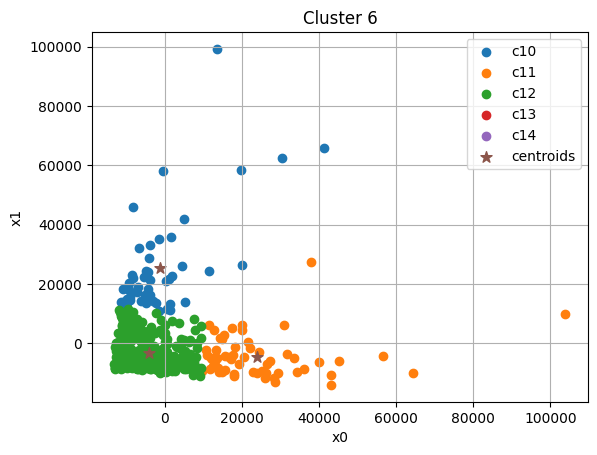

In [19]:
#plotting  with the number of unique values
new_km = ScratchKMeans(n_clusters = 3, max_iter=15, verbose=False, tol=0, random_state=0)
new_km.fit(data_pca)
cl = new_km.predict(data_pca)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for l in range(5):
  ax.scatter(data_pca[:, 0][cl==l], data_pca[:, 1][cl==l], label='c{}'.format(i+l))
ax.scatter(new_km.centroids[:, 0], new_km.centroids[:, 1], s=70, marker='*', label='centroids')
ax.set_title('Cluster {}'.format(i-l))
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.legend()
ax.grid(True)

ax.legend(loc='upper right')
fig.show()

## **Region**

Text(0.5, 1.0, 'Cluster')

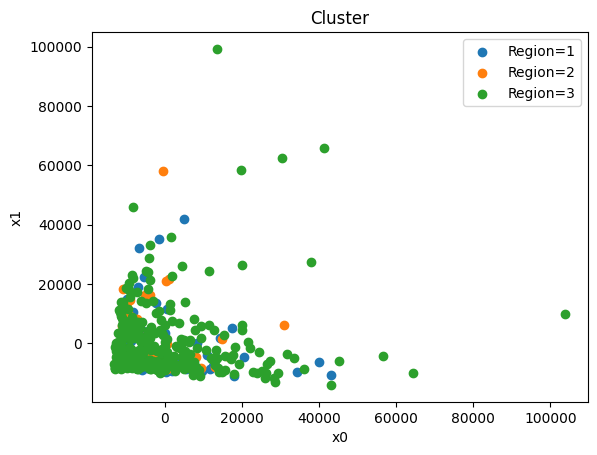

In [20]:
df.Region.unique()
#plotting the unique values
plt.scatter(data_pca[:, 0][df['Region']==1], data_pca[:, 1][df['Region']==1], label='Region=1')
plt.scatter(data_pca[:, 0][df['Region']==2], data_pca[:, 1][df['Region']==2], label='Region=2')
plt.scatter(data_pca[:, 0][df['Region']==3], data_pca[:, 1][df['Region']==3], label='Region=3')
plt.xlabel('x0')
plt.ylabel('x1')
plt.legend()
plt.title('Cluster')

In [21]:
#checking for the value counts of the Known Groups(Region and channel)
df.Channel.value_counts()

Channel
1    298
2    142
Name: count, dtype: int64

there are three unique values in the Region column so this translates to the number of clusters.

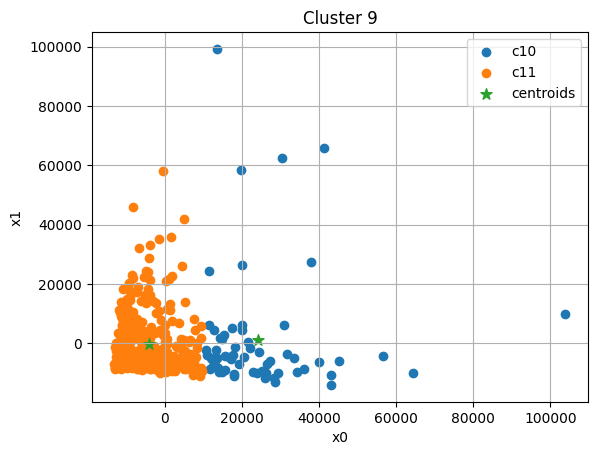

In [22]:
#plotting  with the number of unique values
new_km = ScratchKMeans(n_clusters = 2, max_iter=15, verbose=False, tol=0, random_state=0)
new_km.fit(data_pca)
cl = new_km.predict(data_pca)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for l in range(2):
  ax.scatter(data_pca[:, 0][cl==l], data_pca[:, 1][cl==l], label='c{}'.format(i+l))
ax.scatter(new_km.centroids[:, 0], new_km.centroids[:, 1], s=70, marker='*', label='centroids')
ax.set_title('Cluster {}'.format(i-l))
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.legend()
ax.grid(True)

ax.legend(loc='upper right')
fig.show()

## **Region**

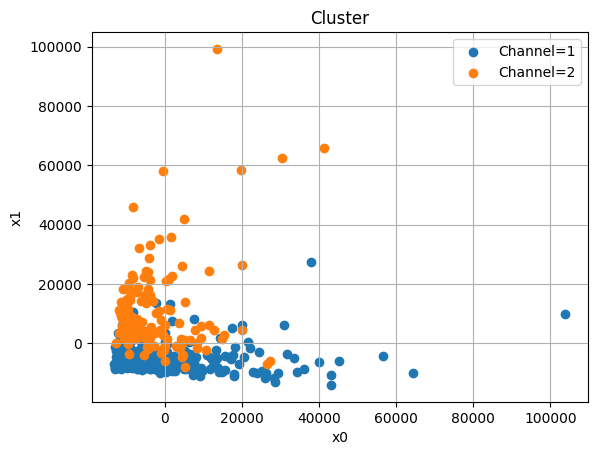

In [23]:
df.Region.unique()
#plotting the unique values
plt.scatter(data_pca[:, 0][df['Channel']==1], data_pca[:, 1][df['Channel']==1], label='Channel=1')
plt.scatter(data_pca[:, 0][df['Channel']==2], data_pca[:, 1][df['Channel']==2], label='Channel=2')
plt.xlabel('x0')
plt.ylabel('x1')
plt.legend()
plt.title('Cluster')
plt.grid(True)

Insight: Comparing the two plots(own clusters vs Region/Channel), it is very obvious that the plot that KMeans clustering was applied showed better results as the second plot had an overlap of the data points. This reveals that the Kmeans clustering can accurately classifies data points into groups.

In [24]:
data['cluster'] = cl
data.head(10)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,12669,9656,7561,214,2674,1338,1
1,7057,9810,9568,1762,3293,1776,1
2,6353,8808,7684,2405,3516,7844,1
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,0
5,9413,8259,5126,666,1795,1451,1
6,12126,3199,6975,480,3140,545,1
7,7579,4956,9426,1669,3321,2566,1
8,5963,3648,6192,425,1716,750,1
9,6006,11093,18881,1159,7425,2098,1


**FRESH**

In [25]:
data.cluster.unique()

array([1, 0])

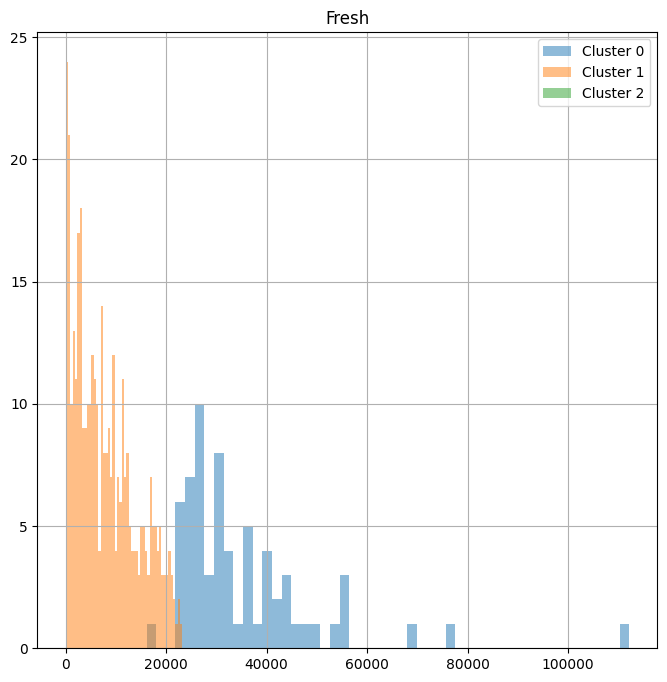

In [26]:
data_cl0 = df[data['cluster']==0]
data_cl1 = df[data['cluster']==1]
data_cl2 = df[data['cluster']==2]
fig, ax = plt.subplots(ncols=1, figsize=(8,8))
ax.hist(data_cl0['Fresh'], bins=50, alpha=0.5, label='Cluster 0')
ax.hist(data_cl1['Fresh'],  bins=50, alpha=0.5, label='Cluster 1')
ax.hist(data_cl2['Fresh'], bins=50, alpha=0.5, label='Cluster 2')
ax.set_title('Fresh')
ax.legend(loc='upper right')
ax.grid(True)

# Plotting with the number of channel

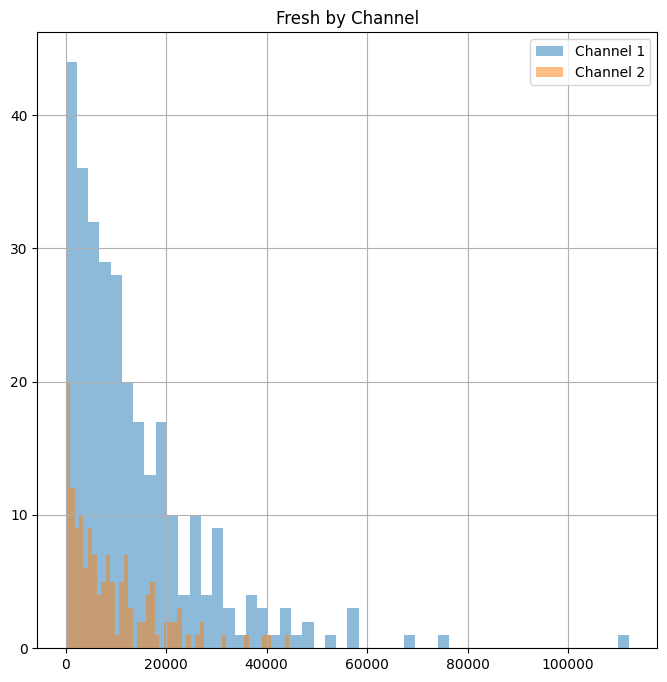

In [27]:
fig, ax = plt.subplots(ncols=1, figsize=(8,8))
ax.hist(df['Fresh'][df['Channel'] == 1], bins=50, alpha=0.5, label='Channel 1')
ax.hist(df['Fresh'][df['Channel'] == 2], bins=50, alpha=0.5, label='Channel 2')
ax.set_title('Fresh by Channel')
ax.legend(loc='upper right')
ax.grid(True)

this shows that people purchasing through channel onw are more than Channel 2

**MILK**

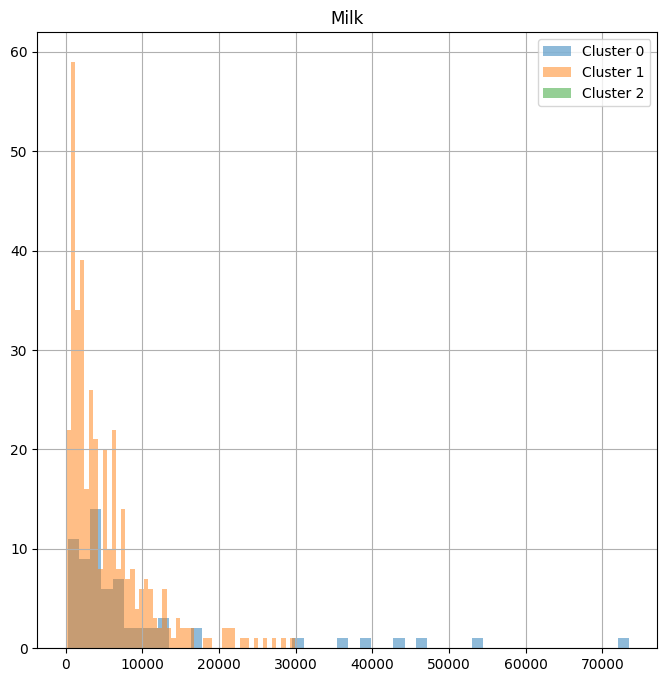

In [28]:
fig, ax = plt.subplots(ncols=1, figsize=(8,8))
ax.hist(data_cl0['Milk'], bins=50, alpha=0.5, label='Cluster 0')
ax.hist(data_cl1['Milk'],  bins=50, alpha=0.5, label='Cluster 1')
ax.hist(data_cl2['Milk'], bins=50, alpha=0.5, label='Cluster 2')
ax.set_title('Milk')
ax.legend(loc='upper right')
ax.grid(True)

PLotting with the Region

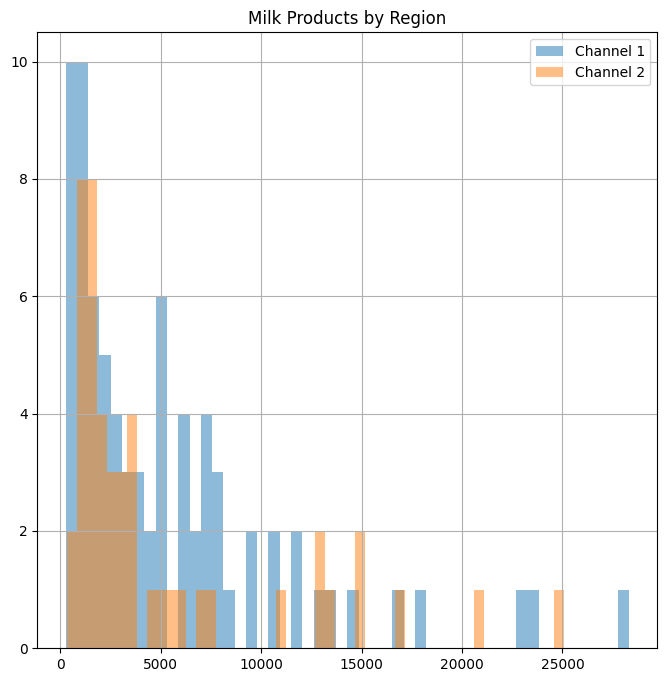

In [29]:
fig, ax = plt.subplots(ncols=1, figsize=(8,8))
ax.hist(df['Milk'][df['Region'] == 1], bins=50, alpha=0.5, label='Channel 1')
ax.hist(df['Milk'][df['Region'] == 2], bins=50, alpha=0.5, label='Channel 2')
ax.set_title('Milk Products by Region')
ax.legend(loc='upper right')
ax.grid(True)

the visaulization reveals that although Region onw still has higher number of customers that purchases milk, region 2 also has an impressive number of customers.

**GROCERY**

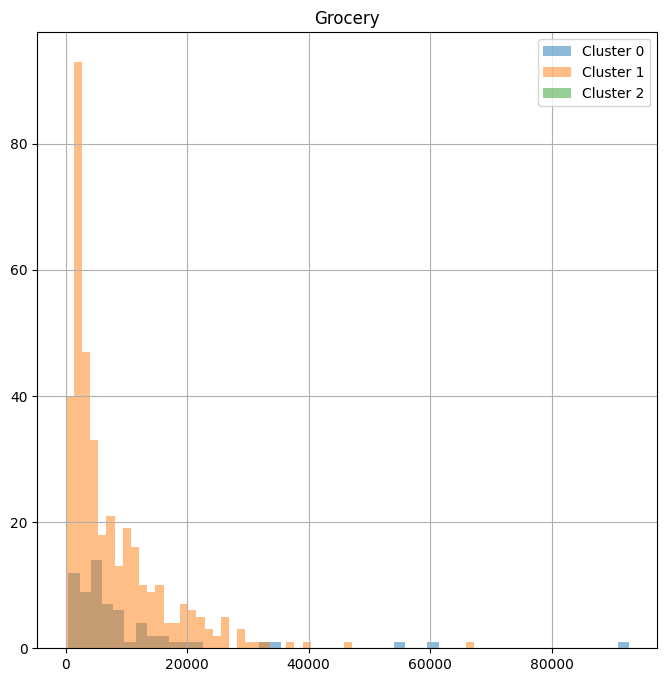

In [30]:
fig, ax = plt.subplots(ncols=1, figsize=(8,8))
ax.hist(data_cl0['Grocery'], bins=50, alpha=0.5, label='Cluster 0')
ax.hist(data_cl1['Grocery'],  bins=50, alpha=0.5, label='Cluster 1')
ax.hist(data_cl2['Grocery'], bins=50, alpha=0.5, label='Cluster 2')
ax.set_title('Grocery')
ax.legend(loc='upper right')
ax.grid(True)

Plotting with munber of Channel

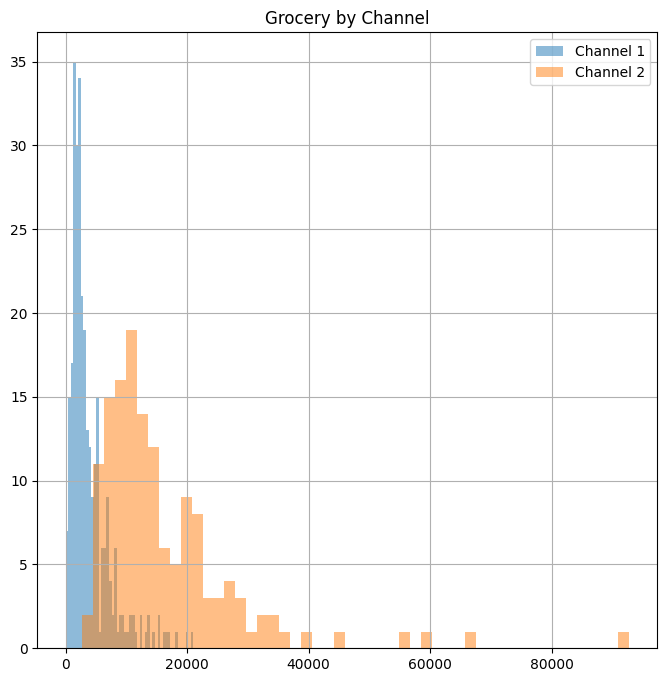

In [31]:
fig, ax = plt.subplots(ncols=1, figsize=(8,8))
ax.hist(df['Grocery'][df['Channel'] == 1], bins=50, alpha=0.5, label='Channel 1')
ax.hist(df['Grocery'][df['Channel'] == 2], bins=50, alpha=0.5, label='Channel 2')
ax.set_title('Grocery by Channel')
ax.legend(loc='upper right')
ax.grid(True)

**FROZEN**

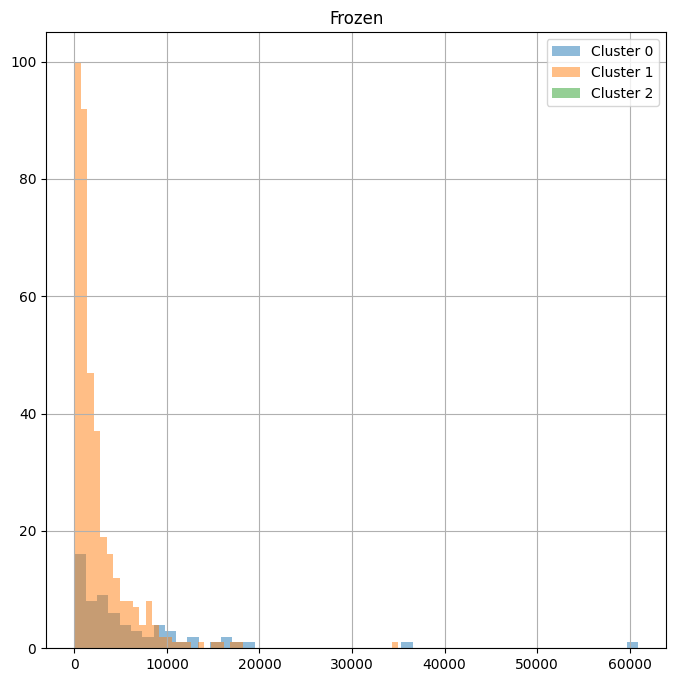

In [32]:
# **FROZEN**
fig, ax = plt.subplots(ncols=1, figsize=(8,8))
ax.hist(data_cl0['Frozen'], bins=50, alpha=0.5, label='Cluster 0')
ax.hist(data_cl1['Frozen'],  bins=50, alpha=0.5, label='Cluster 1')
ax.hist(data_cl2['Frozen'], bins=50, alpha=0.5, label='Cluster 2')
ax.set_title('Frozen')
ax.legend(loc='upper right')
ax.grid(True)

Plotting with the Number of Channel

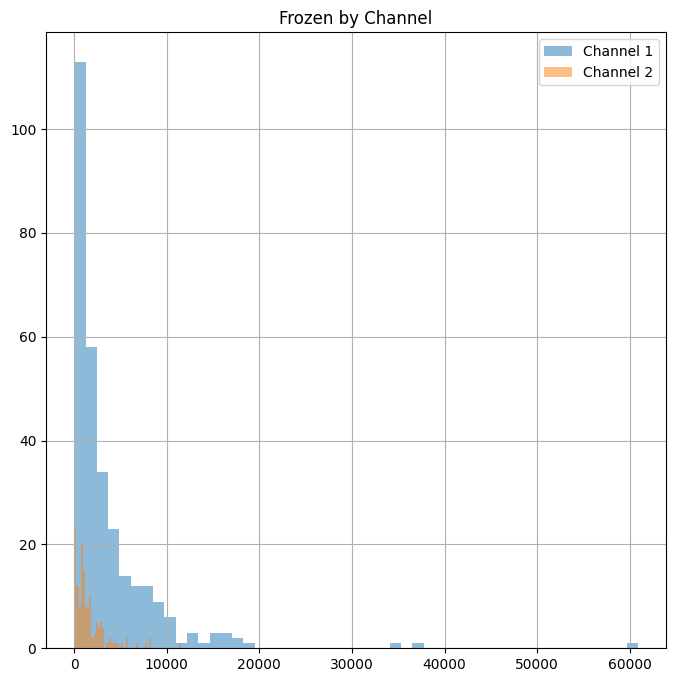

In [33]:
# Plotting with munber of Channel
fig, ax = plt.subplots(ncols=1, figsize=(8,8))
ax.hist(df['Frozen'][df['Channel'] == 1], bins=50, alpha=0.5, label='Channel 1')
ax.hist(df['Frozen'][df['Channel'] == 2], bins=50, alpha=0.5, label='Channel 2')
ax.set_title('Frozen by Channel')
ax.legend(loc='upper right')
ax.grid(True)

**DETERGENT**

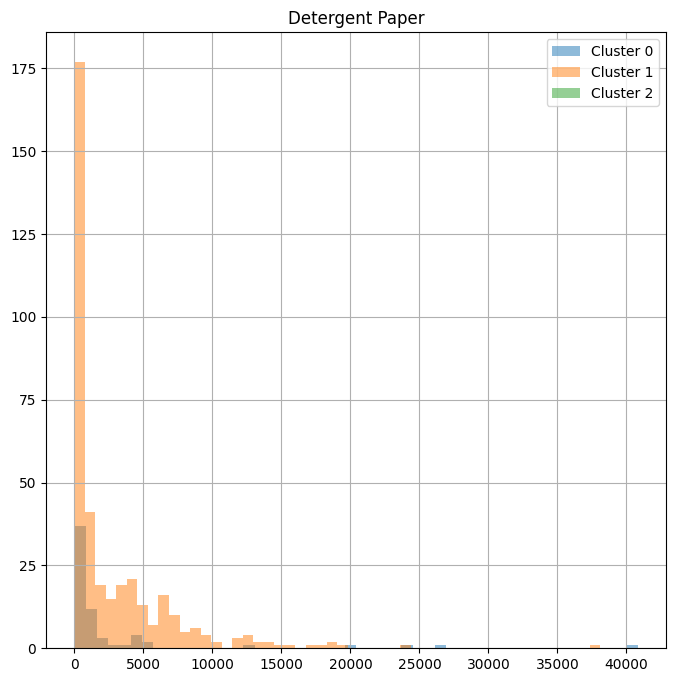

In [34]:
# **DETERGENT_PAPER**
fig, ax = plt.subplots(ncols=1, figsize=(8,8))
ax.hist(data_cl0['Detergents_Paper'], bins=50, alpha=0.5, label='Cluster 0')
ax.hist(data_cl1['Detergents_Paper'],  bins=50, alpha=0.5, label='Cluster 1')
ax.hist(data_cl2['Detergents_Paper'], bins=50, alpha=0.5, label='Cluster 2')
ax.set_title('Detergent Paper')
ax.legend(loc='upper right')
ax.grid(True)

# Plotting with munber of Channel

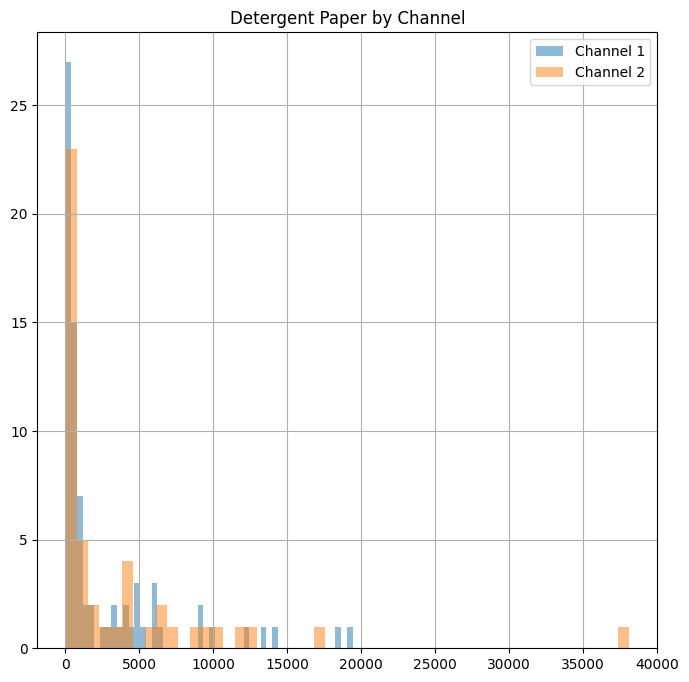

In [35]:
# Plotting with munber of Channel
fig, ax = plt.subplots(ncols=1, figsize=(8,8))
ax.hist(df['Detergents_Paper'][df['Region'] == 1], bins=50, alpha=0.5, label='Channel 1')
ax.hist(df['Detergents_Paper'][df['Region'] == 2], bins=50, alpha=0.5, label='Channel 2')
ax.set_title('Detergent Paper by Channel')
ax.legend(loc='upper right')
ax.grid(True)

In [36]:
# **DELICASSEN**

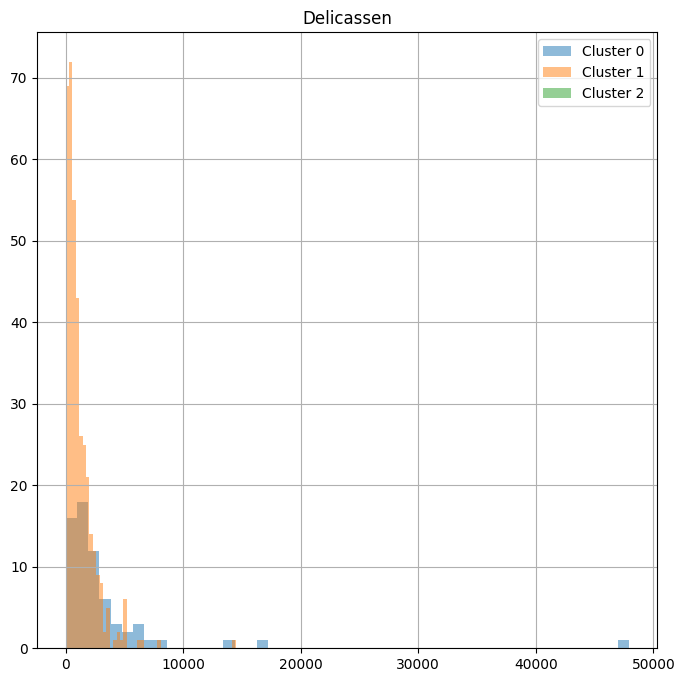

In [37]:
# **DELICASSEN**
fig, ax = plt.subplots(ncols=1, figsize=(8,8))
ax.hist(data_cl0['Delicassen'], bins=50, alpha=0.5, label='Cluster 0')
ax.hist(data_cl1['Delicassen'],  bins=50, alpha=0.5, label='Cluster 1')
ax.hist(data_cl2['Delicassen'], bins=50, alpha=0.5, label='Cluster 2')
ax.set_title('Delicassen')
ax.legend(loc='upper right')
ax.grid(True)

# Plotting with munber of Channel

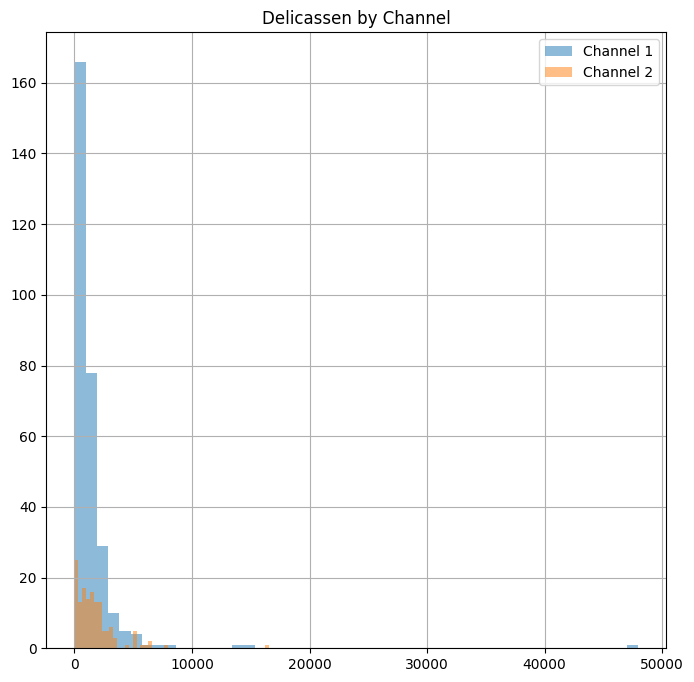

In [38]:

# Plotting with munber of Channel
fig, ax = plt.subplots(ncols=1, figsize=(8,8))
ax.hist(df['Delicassen'][df['Channel'] == 1], bins=50, alpha=0.5, label='Channel 1')
ax.hist(df['Delicassen'][df['Channel'] == 2], bins=50, alpha=0.5, label='Channel 2')
ax.set_title('Delicassen by Channel')
ax.legend(loc='upper right')
ax.grid(True)

Overall, I understand that clustering KMeasn can be used to check patterns in beahviour of customers and this analysis gave an insight on the most loyal customers and the products that has the highest patronage. this can also help the wholeslaer to know which products to give utmost priority and the region oe channels that brings the most profit.

# **Useful Information for the Wholesalers**

In [43]:
data2 = pd.read_csv('/content/Wholesale customers data.csv')
data2 = data2.drop(columns=['Channel', 'Region'])
data2.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [47]:
kmi = ScratchKMeans(n_clusters=5, max_iter=15, verbose=False, tol=0, random_state=0)
kmi.fit(data_pca)
cl1 = kmi.predict(data_pca)
data_cll0 = data2[cl1==0]
data_cll1 = data2[cl1==1]
data_cll2 = data2[cl1==2]
data_cll3 = data2[cl1==3]
data_cll4 = data2[cl1==4]
cl_data = pd.DataFrame(cl1)
cl_data.head()
cl_data = cl_data.rename(columns={0:'cluster'})
#adding the cluster column to the data
data_add_cl = pd.concat([data2, cl_data], axis=1)

data_add_cl =data_add_cl.groupby('cluster').mean()
data_add_cl

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,
0,48777.375000,6607.375000,6197.791667,9462.791667,932.125000,4435.333333
1,6142.111607,3239.107143,4052.589286,2453.406250,1192.767857,981.312500
2,4691.087500,11391.887500,17919.425000,1440.650000,7835.875000,1566.762500
3,18192.400000,35361.600000,48052.200000,3308.400000,23534.900000,4461.100000
4,21337.549020,3933.852941,5176.068627,4182.784314,1138.107843,1713.029412


from the statistics, one can Detergents paper has the least patronage majorly in cluster 1 and 4, this will require the wholesaler to try and gain visibility to increase sales in that region/channel

# Distribution of resources

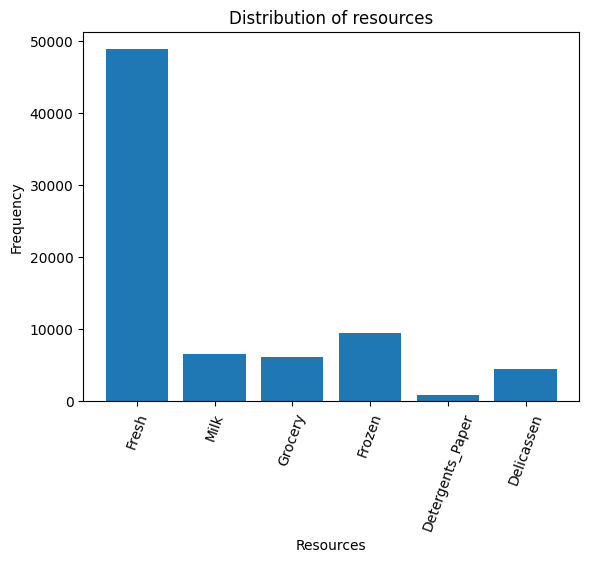

In [56]:
height = np.array(data_add_cl.iloc[0])
plt.bar(data_add_cl.columns, height)
plt.title('Distribution of resources')
plt.xlabel('Resources')
plt.ylabel('Frequency')
plt.xticks(rotation=70)
plt.show()

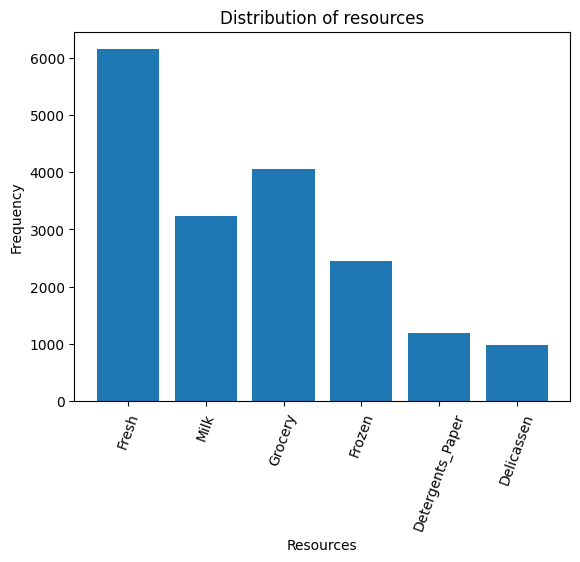

In [55]:
height = np.array(data_add_cl.iloc[1])
plt.bar(data_add_cl.columns, height)
plt.title('Distribution of resources')
plt.xlabel('Resources')
plt.ylabel('Frequency')
plt.xticks(rotation=70)
plt.show()

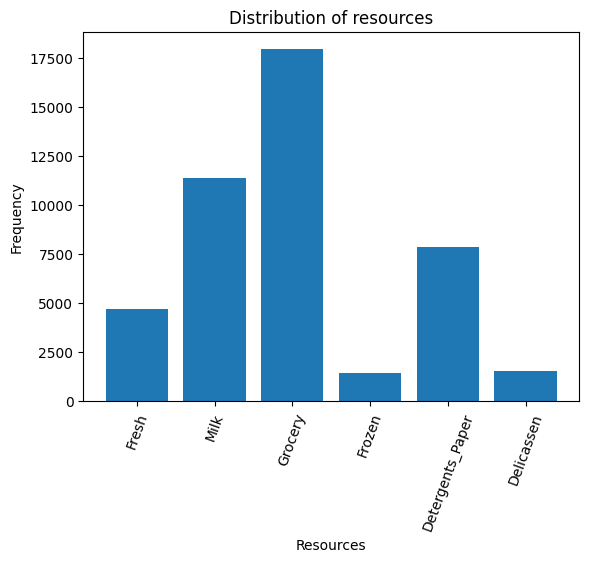

In [54]:
height = np.array(data_add_cl.iloc[2])
plt.bar(data_add_cl.columns, height)
plt.title('Distribution of resources')
plt.xlabel('Resources')
plt.ylabel('Frequency')
plt.xticks(rotation=70)
plt.show()

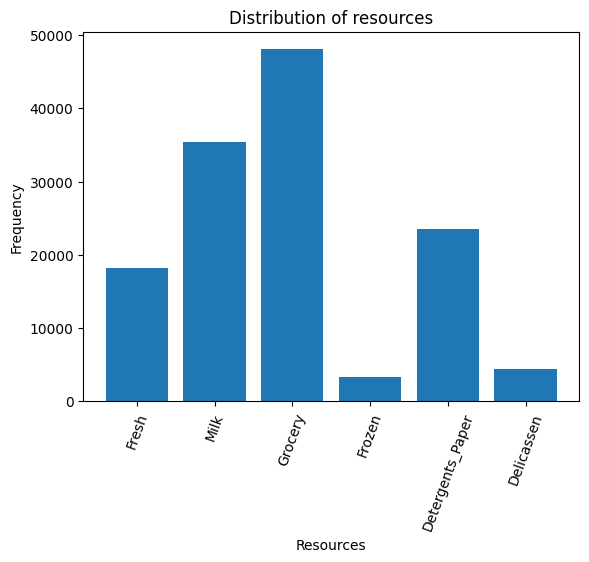

In [57]:
height = np.array(data_add_cl.iloc[3])
plt.bar(data_add_cl.columns, height)
plt.title('Distribution of resources')
plt.xlabel('Resources')
plt.ylabel('Frequency')
plt.xticks(rotation=70)
plt.show()

the plot for the Distribution of resources portrays that cluster one had the highest distribution for Fresh products i.e has more patronages than any of the other produtcs while for cluster 3 Grocery had the highest but other products also showed an impressive performanace.